In [183]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from pandas.io.json import json_normalize
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.simplefilter(action='ignore', category=Warning)

In [7]:
lol_df = pd.read_pickle('./match_data_version2.pickle')
lol_df.head()

,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code,teams
0,1.585155e+12,1323.0,4247263043,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
1,1.585152e+12,1317.0,4247155821,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F..."
2,1.585059e+12,932.0,4243963257,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
3,1.584978e+12,2098.0,4241678498,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ..."
4,1.584973e+12,2344.0,4241538868,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN,"[{'teamId': 100, 'win': 'Win', 'firstBlood': T..."


In [3]:
# team_a = pd.DataFrame()
# team_b = pd.DataFrame()
# pickle.dump(team_a, open('./team_a_dump', 'wb'))
# pickle.dump(team_b, open('./team_b_dump', 'wb'))

In [8]:
#a팀 b팀 분리
team_a_error = []
team_b_error = []
team_a = pd.DataFrame()
team_b = pd.DataFrame()
for i in range(len(lol_df)):
    if i % 1000 == 0:
        print(str(i)+'행 처리중')
    try:
        team_a = team_a.append(json_normalize(lol_df['teams'].iloc[i][0]))
        team_b = team_b.append(json_normalize(lol_df['teams'].iloc[i][1]))
    except:
        team_a_error.append(i)
        team_b_error.append(i)
        print(str(i)+'행에서 오류')
        pass
    
pickle.dump(team_a, open('./team_a_dump.pickle', 'wb'))
pickle.dump(team_b, open('./team_b_dump.pickle', 'wb'))

0행 처리중
1000행 처리중
2000행 처리중
3000행 처리중
4000행 처리중
5000행 처리중
6000행 처리중
7000행 처리중
8000행 처리중
9000행 처리중
10000행 처리중
11000행 처리중
12000행 처리중
13000행 처리중
14000행 처리중
15000행 처리중
16000행 처리중
17000행 처리중
18000행 처리중
19000행 처리중
20000행 처리중
21000행 처리중
22000행 처리중
23000행 처리중
24000행 처리중
25000행 처리중
26000행 처리중
27000행 처리중
28000행 처리중
29000행 처리중
30000행 처리중
31000행 처리중
32000행 처리중
33000행 처리중
34000행 처리중
35000행 처리중
36000행 처리중
37000행 처리중
38000행 처리중
39000행 처리중
40000행 처리중
41000행 처리중
42000행 처리중
43000행 처리중
44000행 처리중
45000행 처리중
46000행 처리중
47000행 처리중
48000행 처리중
49000행 처리중
50000행 처리중
51000행 처리중
52000행 처리중
53000행 처리중
54000행 처리중
55000행 처리중
56000행 처리중
57000행 처리중
58000행 처리중
59000행 처리중
60000행 처리중
61000행 처리중
62000행 처리중
63000행 처리중
64000행 처리중
65000행 처리중
66000행 처리중
67000행 처리중
68000행 처리중
69000행 처리중
70000행 처리중
71000행 처리중
72000행 처리중
73000행 처리중
74000행 처리중
75000행 처리중
76000행 처리중
77000행 처리중
78000행 처리중
79000행 처리중
80000행 처리중
81000행 처리중
82000행 처리중
83000행 처리중
84000행 처리중
85000행 처리중
86000행 처리중
87000행 처리중
88000행 처리중
89000행 처리중
90000행 처리중
91000행 처리중
9

In [9]:
for i in range(len(team_a)):
    wf_valid = team_a['win'].iloc[i]
    
    if team_b['win'].iloc[i] != wf_valid:
        pass
    else:
        print(str(i)+'행 데이터 정합성 문제')

In [10]:
#각 경기별 게임 시간 병합
lol_df = lol_df.drop(index = team_a_error)

team_a['gameDuration'] = lol_df['gameDuration'].tolist()
team_b['gameDuration'] = lol_df['gameDuration'].tolist()

lol_df['gameDuration'].index = range(len(lol_df))
team_a['gameDuration'].index = range(len(team_a))
team_b['gameDuration'].index = range(len(team_b))

In [11]:
game_df = pd.concat([team_a,team_b],axis=0)
game_df.head()

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,gameDuration
0,100,Fail,True,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion...",1323.0
0,100,Win,False,False,False,False,True,True,4,0,0,2,0,2,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",1317.0
0,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio...",932.0
0,100,Fail,False,False,False,True,True,False,2,0,1,1,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio...",2098.0
0,100,Win,True,True,True,True,True,True,11,3,2,2,0,2,0,"[{'championId': 30, 'pickTurn': 1}, {'champion...",2344.0


In [12]:
#분석의 용이성을 위해서 타겟 데이터를 제외한 범주형 데이터를 인코딩
'''
True : 1
False : 0
'''
tf_mapping = {True:1,False:0}
bool_column = game_df.select_dtypes('bool').columns.tolist()

for i in bool_column:
    game_df[i] = game_df[i].map(tf_mapping)
    
wl_mapping = {'Win':'Win','Fail':'Lose'}
game_df['win'] = game_df['win'].map(wl_mapping)

EDA (탐색적 자료 분석) - Exploratory Data Analysis

### 3.0 통계치 확인
- 승리팀 & 패배팀

### 승리팀

In [11]:
game_df[game_df['win']=='Win'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,145796.000000,145796.000000,145796.000000,145796.000000
mean,6.689168,1.188976,0.494581,1.959937
std,2.698300,0.956853,0.620891,1.280124
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,1.000000
50%,7.000000,1.000000,0.000000,2.000000
75%,9.000000,2.000000,1.000000,3.000000
max,11.000000,10.000000,5.000000,7.000000


### 패배팀

In [12]:
game_df[game_df['win']=='Lose'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,145782.000000,145782.000000,145782.000000,145782.000000
mean,1.854303,0.136176,0.109643,0.816267
std,1.980308,0.475756,0.354936,1.015968
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,1.000000
max,11.000000,9.000000,4.000000,6.000000


### 3.1. 범주형 시각화

In [13]:
def first_valid_visualize(df,target,variable):
    sns.factorplot(target,variable,data=df)
    plt.title(variable+' winrate')
    #plt.xticks(df[target])
    plt.show()

#### factorplot은 어떤 종속변수에 대하여 연속형 변수나 정수형변수의 확률값을 알려줍니다.

#### firstBlood

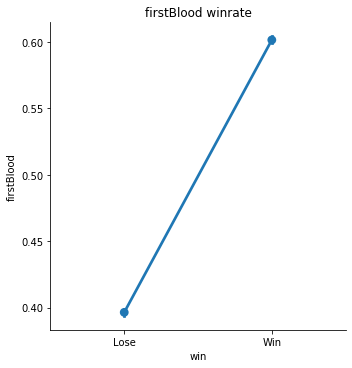

In [111]:
first_valid_visualize(game_df,'win','firstBlood')
plt.show()

#### firstTower

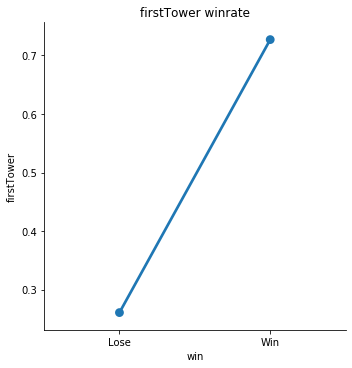

In [20]:
first_valid_visualize(game_df,'win','firstTower')
plt.show()

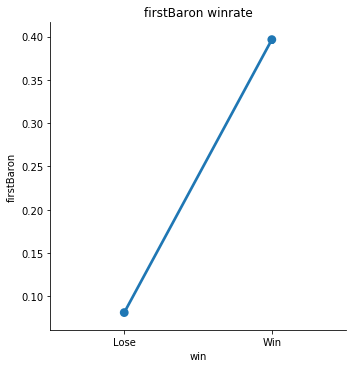

In [21]:
first_valid_visualize(game_df,'win','firstBaron')
plt.show()

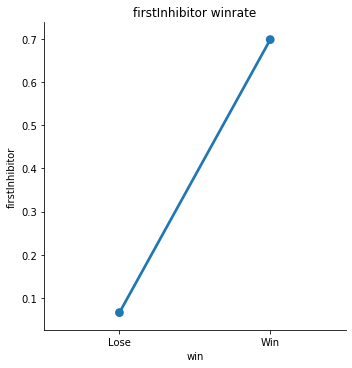

In [22]:
first_valid_visualize(game_df,'win','firstInhibitor')
plt.show()

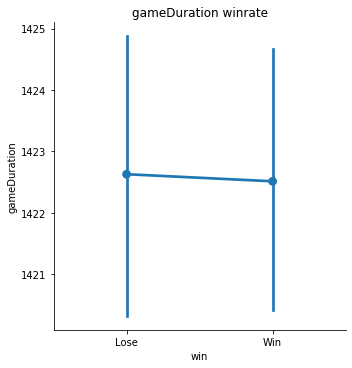

In [25]:
first_valid_visualize(game_df,'win','gameDuration')
plt.show()

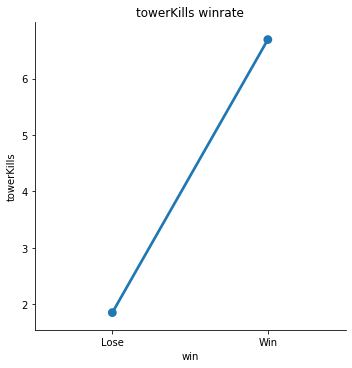

In [26]:
first_valid_visualize(game_df,'win','towerKills')
plt.show()

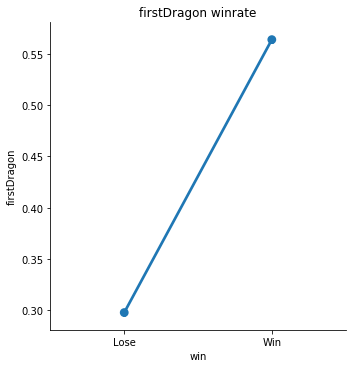

In [27]:
first_valid_visualize(game_df,'win','firstDragon')
plt.show()

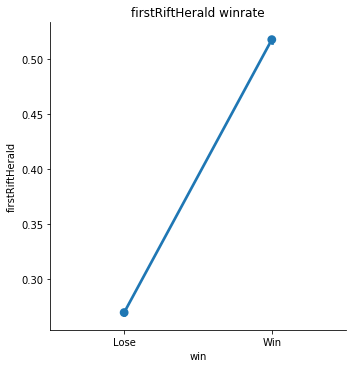

In [145]:
first_valid_visualize(game_df,'win','firstRiftHerald')
plt.show()

### 3.2. 경기 시간 segment별 EDA

#### 게임에 걸린 시간별로 데이터를 segment화

##### 게임 시간을 20분 이하 게임, 30분 이하 게임, 30분 이상게임, 40분 이상 게임 의 4개의 세그먼트로 나눔

In [ ]:
#n_tile로 게임시간을 분위수로 파악
#part1
game_df['game_time'] = game_df['gameDuration']/60

game_part1 = game_df[game_df['game_time']>=30].sort_values('win')
game_part2 = game_df[game_df['game_time']>=40].sort_values('win')
game_part3 = game_df[game_df['game_time']<30].sort_values('win')
game_part4 = game_df[game_df['game_time']<20].sort_values('win')


##### 시각화 코드

In [168]:
def first_time_ratio(target,variable):
    global game_part1, game_part2, game_part3, game_part4
    
    sns.factorplot(target, variable, sharey=False,data=game_part1, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part2, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part3, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part4, size=4, aspect=3, legend_out=False)

##### 게임 시간대별 승리팀과 패배팀의 firstBlood 비율

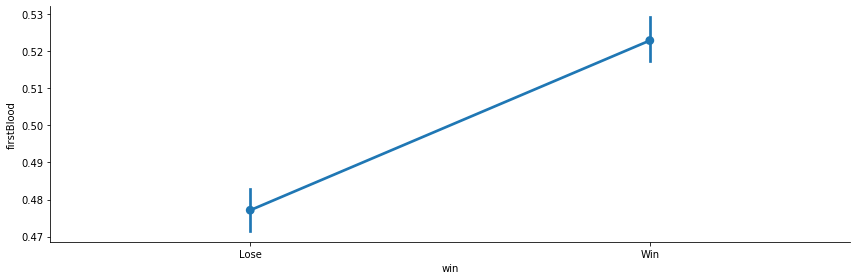

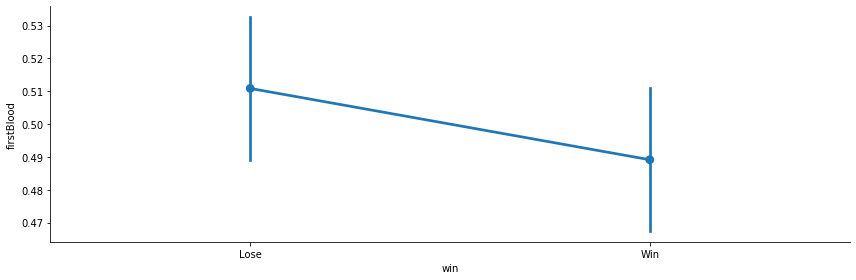

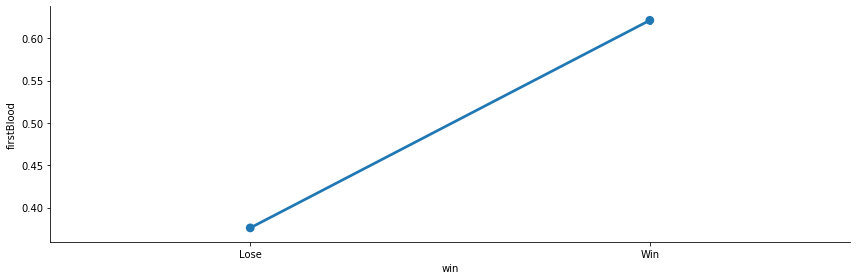

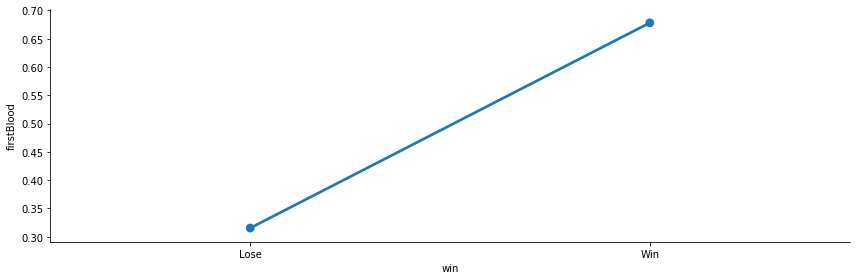

In [169]:
first_time_ratio('win','firstBlood')

# 연속형 데이터 EDA

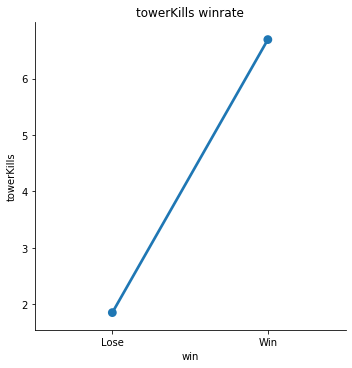

In [119]:
first_valid_visualize(game_df,'win','towerKills')
plt.show()

## 경기 시간 segment 데이터별 EDA

In [120]:
def sequence_var_inf(variable):
    global game_part1, game_part2, game_part3, game_part4
    
    value1 = game_part4[variable].value_counts().keys().tolist()
    value2 = game_part3[variable].value_counts().keys().tolist()
    value3 = game_part1[variable].value_counts().keys().tolist()
    value4 = game_part2[variable].value_counts().keys().tolist()
    
    value1.sort()
    value2.sort()
    value3.sort()
    value4.sort()
    print('=============================')
    print('GameTime < 20 minute')
    print('=============================\n')
    for i in value1:
        try:
            a = game_part4[game_part4[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part4[game_part4[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
    
    print('=============================')
    print('GameTime < 30 minute')
    print('=============================\n')
    for i in value2:
        try:
            a = game_part3[game_part3[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part3[game_part3[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
        
    print('=============================')
    print('GameTime > 30 minute')
    print('=============================\n')
    for i in value3:
        try:
            a = game_part1[game_part1[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part1[game_part1[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))
        
    print('=============================')
    print('GameTime > 40 minute')
    print('=============================\n')
    for i in value4:
        try:
            a = game_part2[game_part2[variable]==i]['win'].value_counts().values[0]
        except:
            a = 0
        try:
            b = game_part2[game_part2[variable]==i]['win'].value_counts().values[1]
        except:
            b = 0
        print(variable+' 변수가 '+str(i)+' 일 때\n Win : {}\n Lose : {}\n'.format(a,b))

## 결과

In [121]:
sequence_var_inf('dragonKills')

GameTime < 20 minute

dragonKills 변수가 0 일 때
 Win : 36873
 Lose : 15975

dragonKills 변수가 1 일 때
 Win : 14362
 Lose : 7590

dragonKills 변수가 2 일 때
 Win : 13543
 Lose : 1192

dragonKills 변수가 3 일 때
 Win : 1715
 Lose : 172

dragonKills 변수가 4 일 때
 Win : 271
 Lose : 28

dragonKills 변수가 5 일 때
 Win : 3
 Lose : 0

GameTime < 30 minute

dragonKills 변수가 0 일 때
 Win : 70030
 Lose : 23769

dragonKills 변수가 1 일 때
 Win : 30667
 Lose : 24891

dragonKills 변수가 2 일 때
 Win : 36603
 Lose : 12164

dragonKills 변수가 3 일 때
 Win : 23298
 Lose : 3291

dragonKills 변수가 4 일 때
 Win : 7848
 Lose : 337

dragonKills 변수가 5 일 때
 Win : 103
 Lose : 9

GameTime > 30 minute

dragonKills 변수가 0 일 때
 Win : 3927
 Lose : 593

dragonKills 변수가 1 일 때
 Win : 8367
 Lose : 2636

dragonKills 변수가 2 일 때
 Win : 8817
 Lose : 6877

dragonKills 변수가 3 일 때
 Win : 8987
 Lose : 6119

dragonKills 변수가 4 일 때
 Win : 8508
 Lose : 1902

dragonKills 변수가 5 일 때
 Win : 1632
 Lose : 142

dragonKills 변수가 6 일 때
 Win : 47
 Lose : 10

dragonKills 변수가 7 일 때
 Win : 4
 

## 각 segment별로 해당 수치형 데이터들이 이긴 팀과 진팀에 어떤 비율로 반영되어 있는지 확인

In [176]:
def first_time_ratio(target,variable):
    global game_part1, game_part2, game_part3, game_part4
    
    sns.factorplot(target, variable, sharey=False,data=game_part1, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part2, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part3, size=4, aspect=3, legend_out=False)
    sns.factorplot(target, variable, sharey=False,data=game_part4, size=4, aspect=3, legend_out=False)

## 결과

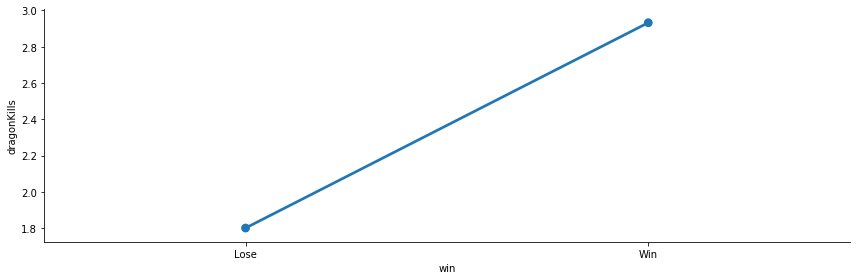

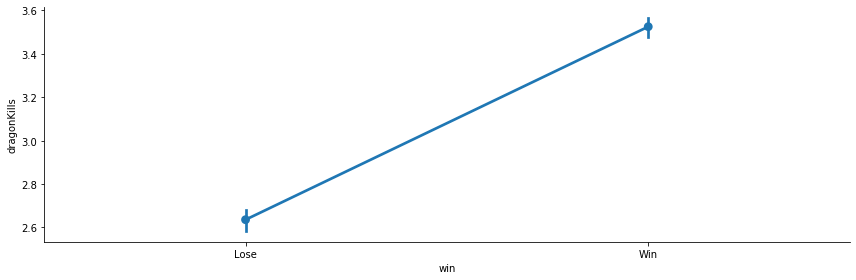

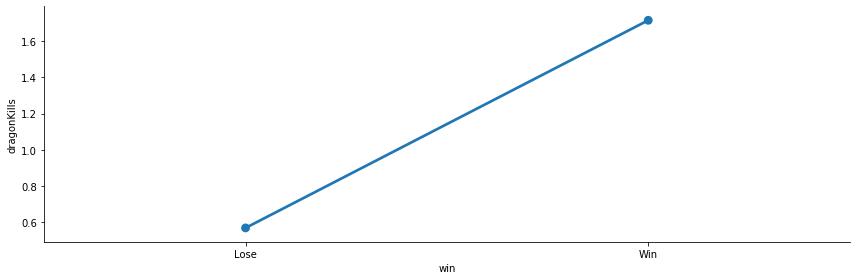

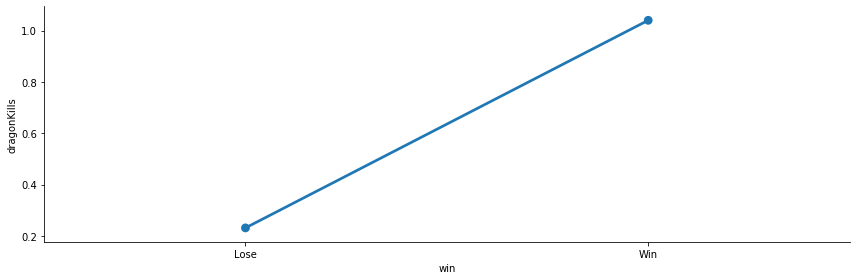

In [177]:
first_time_ratio('win','dragonKills')
plt.show()

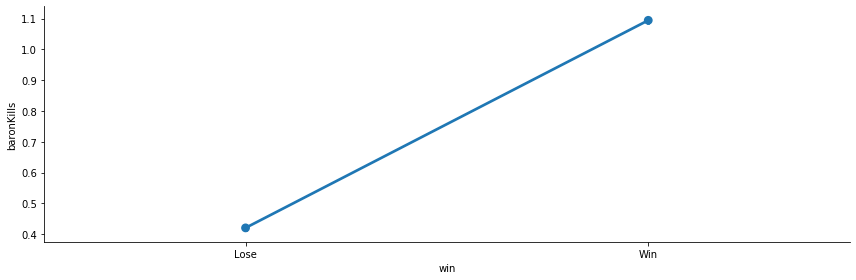

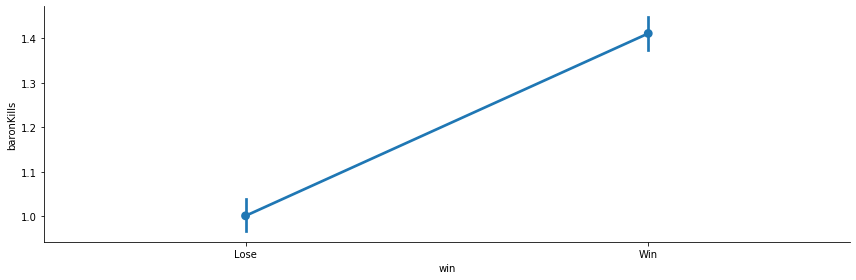

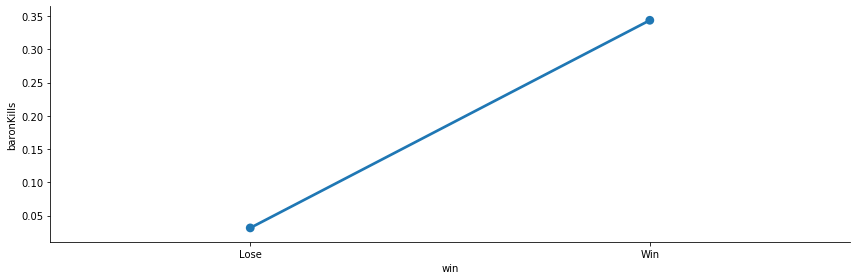

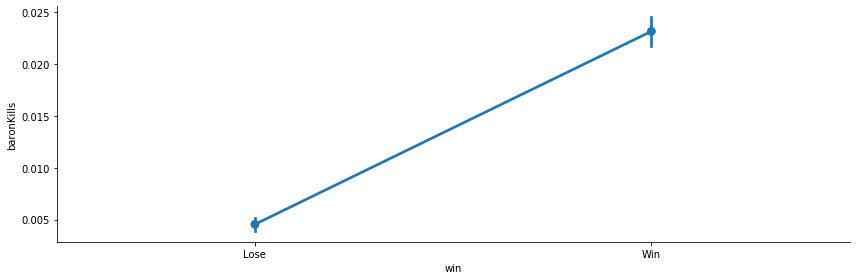

In [171]:
first_time_ratio('win','baronKills')
plt.show()

# 회기분석

In [179]:
lol_df = lol_df.drop(index = team_a_error)

team_a['gameDuration'] = lol_df['gameDuration'].tolist()
team_b['gameDuration'] = lol_df['gameDuration'].tolist()

lol_df['gameDuration'].index = range(len(lol_df))
team_a['gameDuration'].index = range(len(team_a))
team_b['gameDuration'].index = range(len(team_b))

game_df = pd.concat([team_a,team_b],axis=0)

#분석의 용이성을 위해서 타겟 데이터를 제외한 범주형 데이터를 인코딩
'''
True : 1
False : 0
'''
tf_mapping = {True:1,False:0}
bool_column = game_df.select_dtypes('bool').columns.tolist()

for i in bool_column:
    game_df[i] = game_df[i].map(tf_mapping)
    
wl_mapping = {'Win':'Win','Fail':'Lose'}
game_df['win'] = game_df['win'].map(wl_mapping)

game_df['game_time'] = game_df['gameDuration']/60

game_df['win_encoding'] = game_df['win'].map({'Win':1,'Lose':0})

In [180]:
game_df.select_dtypes(['int64','float64']).corr()[['win_encoding']]

,win_encoding
teamId,0.007456
firstBlood,0.205187
firstTower,0.466065
firstInhibitor,0.650580
firstBaron,0.369640
firstDragon,0.268575
firstRiftHerald,0.253565
towerKills,0.714565
inhibitorKills,0.571612
baronKills,0.355698


## null 값 제거

In [181]:
reg_df = game_df.drop(columns=['teamId','vilemawKills','dominionVictoryScore','win','bans','game_time'])
reg_df = reg_df.dropna()
reg_df['win_encoding'] = reg_df['win_encoding'].astype('int64')

## 로지스틱 회귀분석 시행

In [184]:
logit = sm.Logit(reg_df[['win_encoding']],reg_df[reg_df.columns.tolist()[:-2]]) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.513400
         Iterations 6


## Summary

In [185]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.259      
Dependent Variable: win_encoding     AIC:              299414.1321
Date:               2020-08-12 17:04 BIC:              299530.5458
No. Observations:   291578           Log-Likelihood:   -1.4970e+05
Df Model:           10               LL-Null:          -2.0211e+05
Df Residuals:       291567           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
firstBlood        -0.8029   0.0089 -90.2044 0.0000 -0.8204 -0.7855
firstTower         0.4403   0.0113  38.8014 0.0000  0.4181  0.4626
firstInhibitor     1.7972   0.0193  93.1805 0.0000  1.7594  1.8350
firstBaron         0.5161   0.0262  19.7318 0.0000  0.4649  0.5674
firstDragon       -0.1017   0.0120  -8.4690 0.0000 -0.1253 -0.0782
firstRiftHerald   -0.3925   0.0183 -21.4356 0.0000 -0.4284 -0.3566
towerKills         0.1226   0.0032  38.8019 0.0000  0.1165  0.1288
inhibitorKills     0.2133   0.0122  17.5122 0.0000  0.1895  0.2372
baronKills        -0.1698   0.0215  -7.8833 0.0000 -0.2120 -0.1276
dragonKills       -0.1067   0.0061 -17.4764 0.0000 -0.1187 -0.0948
riftHeraldKills   -0.0894   0.0135  -6.6020 0.0000 -0.1160 -0.0629
==================================================================

"""

## 해석

In [186]:
for i in range(len(result.params)):
    print('다른 변수가 고정되어 있으며, {} 이 한단위 상승할 때 승리할 확률이 {} 배 증가한다.\n'.format(result.params.keys()[i],np.exp(result.params.values[i])))

다른 변수가 고정되어 있으며, firstBlood 이 한단위 상승할 때 승리할 확률이 0.44800745384781115 배 증가한다.

다른 변수가 고정되어 있으며, firstTower 이 한단위 상승할 때 승리할 확률이 1.5532065093890544 배 증가한다.

다른 변수가 고정되어 있으며, firstInhibitor 이 한단위 상승할 때 승리할 확률이 6.03264158891065 배 증가한다.

다른 변수가 고정되어 있으며, firstBaron 이 한단위 상승할 때 승리할 확률이 1.6755421263867605 배 증가한다.

다른 변수가 고정되어 있으며, firstDragon 이 한단위 상승할 때 승리할 확률이 0.9032566525447728 배 증가한다.

다른 변수가 고정되어 있으며, firstRiftHerald 이 한단위 상승할 때 승리할 확률이 0.6753679615689557 배 증가한다.

다른 변수가 고정되어 있으며, towerKills 이 한단위 상승할 때 승리할 확률이 1.1304843540142444 배 증가한다.

다른 변수가 고정되어 있으며, inhibitorKills 이 한단위 상승할 때 승리할 확률이 1.2378001756846007 배 증가한다.

다른 변수가 고정되어 있으며, baronKills 이 한단위 상승할 때 승리할 확률이 0.8438477320711012 배 증가한다.

다른 변수가 고정되어 있으며, dragonKills 이 한단위 상승할 때 승리할 확률이 0.8987709568655167 배 증가한다.

다른 변수가 고정되어 있으며, riftHeraldKills 이 한단위 상승할 때 승리할 확률이 0.9144477857097907 배 증가한다.



In [189]:
result.params

firstBlood        -0.802945
firstTower         0.440322
firstInhibitor     1.797185
firstBaron         0.516137
firstDragon       -0.101749
firstRiftHerald   -0.392498
towerKills         0.122646
inhibitorKills     0.213336
baronKills        -0.169783
dragonKills       -0.106727
riftHeraldKills   -0.089435
dtype: float64

## 단일 모델 해석

In [190]:
reg_df2 = reg_df[reg_df.columns.tolist()[:-2] + ['win_encoding']]
explain_var = reg_df2.columns.tolist()[:-1]

coef_ls = []
pvalue_ls = []
exp_ls = []
var_ls = []
simple_model = pd.DataFrame()

for i in explain_var:
    logit = sm.Logit(reg_df2[['win_encoding']],reg_df[[i]]) #로지스틱 회귀분석 시행
    result = logit.fit()
    
    coef_ls.append(result.params.values[0])
    pvalue_ls.append(result.pvalues.values[0])
    exp_ls.append(str(round(np.exp(result.params.values[0]),3)) + '배 증가')
    var_ls.append(i)

simple_model['variance'] = var_ls
simple_model['coefficient'] = coef_ls
simple_model['solution'] = exp_ls
simple_model['p_value'] = pvalue_ls

Optimization terminated successfully.
         Current function value: 0.682519
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.635922
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.540615
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636501
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.672274
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673320
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.585575
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.555584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.639020
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645485
  